In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error


In [3]:
data=pd.read_csv("/Users/prajwala/Documents/git/Regression_srilankan/modified_dataset.csv")

In [4]:
data.head()

,Unnamed: 0,Year,Agriculture,Revenue,Debts,Imports,Exports,Tourism
0,0,1960,99.56,967862.0,46585.7,421.3,377.2,392250.0
1,1,1961,99.56,967862.0,46585.7,376.7,358.5,392250.0
2,2,1962,99.56,967862.0,46585.7,400.3,370.2,392250.0
3,3,1963,99.56,967862.0,46585.7,392.5,358.7,392250.0
4,4,1964,99.56,967862.0,46585.7,411.6,371.1,392250.0


In [7]:
data=data.drop(columns=['Unnamed: 0'])

In [8]:
data.head()

,Year,Agriculture,Revenue,Debts,Imports,Exports,Tourism
0,1960,99.56,967862.0,46585.7,421.3,377.2,392250.0
1,1961,99.56,967862.0,46585.7,376.7,358.5,392250.0
2,1962,99.56,967862.0,46585.7,400.3,370.2,392250.0
3,1963,99.56,967862.0,46585.7,392.5,358.7,392250.0
4,1964,99.56,967862.0,46585.7,411.6,371.1,392250.0


In [9]:
X = data[['Agriculture', 'Tourism', 'Imports']]  
y = data['Revenue']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = Ridge(alpha=1.0)  
model.fit(X_train_scaled, y_train)

Ridge()

In [13]:
y_pred = model.predict(X_test_scaled)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 148769.73487835206
R²: 0.8482615773250101


In [21]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 36417986908.66049


In [15]:
residuals = y_test - y_pred

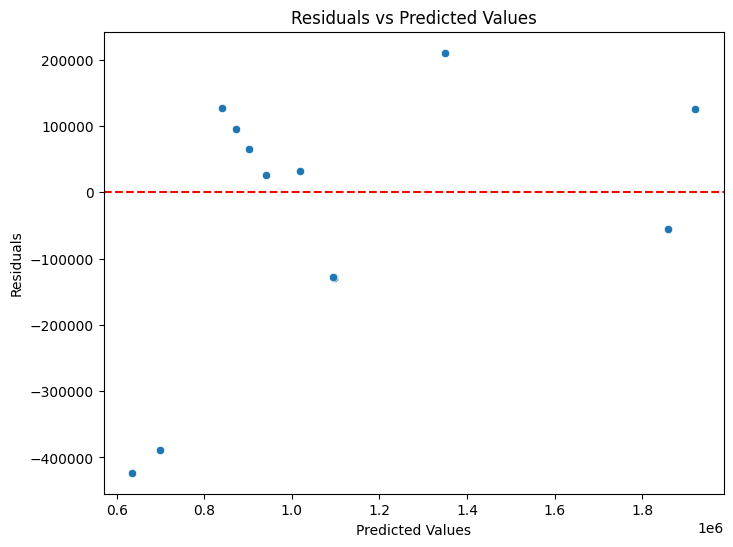

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

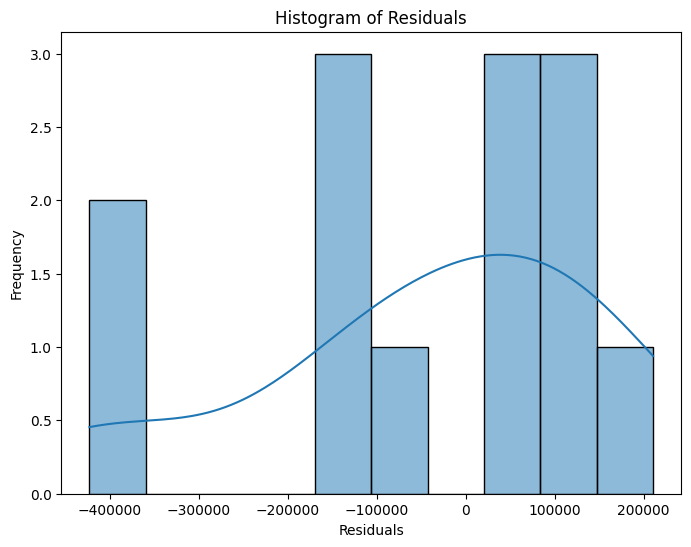

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=10)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

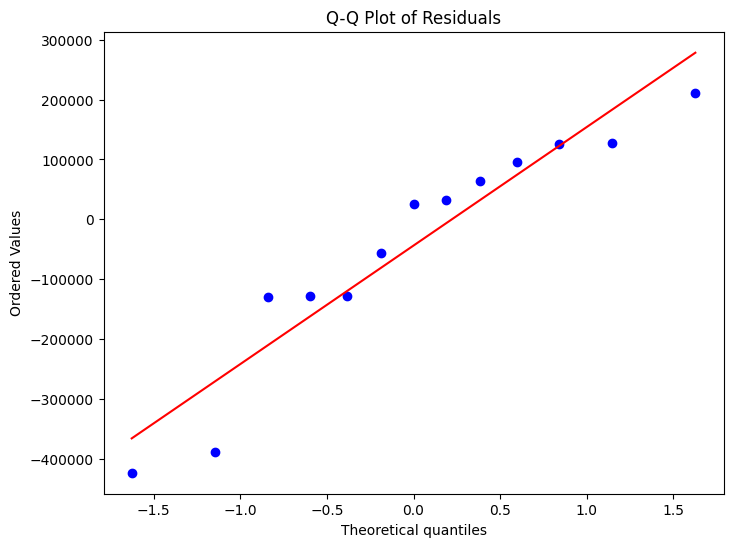

In [18]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

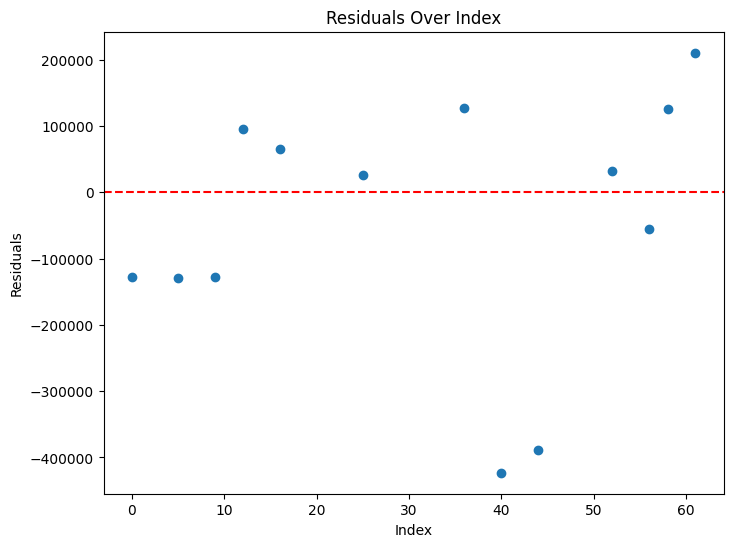

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(residuals, marker='o', linestyle='none')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Over Index")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.show()